In [64]:
# Import Modules
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
# from scipy.stats import norm, chi2
import scipy.stats as st
# import statsmodels.api as sm

# Import Data
df = pd.read_csv("../data/13222067_cleaned.csv")
df.head()

,jenis_kelamin,usia,pendidikan,pekerjaan,penghasilan,domisili,durasi_internet,aktivitas_online_meningkat,aktivitas_online_meningkat_3bln,layanan_aktif_1,...,bayar_online_5,bayar_online_6,bayar_online_7,bayar_online_8,keluhan_online_1,keluhan_online_2,keluhan_online_3,keluhan_online_4,keluhan_online_5,keluhan_online_6
0,Pria,47,SMA,Pekerja Serabutan,Rp 2 juta – Rp 5 juta,bandung,3.0,Sama saja,NaN,Mobile Banking,...,NaN,NaN,Melalui minimarket,NaN,Barang yang diperoleh tidak sesuai dengan spes...,Barang rusak/ salah tetapi tidak dapat dikemba...,NaN,NaN,NaN,NaN
1,Wanita,19,SMA,Pelajar / Mahasiswa,< Rp 2 juta,surabaya,10.0,Ya,Keperluan mengerjakan tugas,Mobile Banking,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Pria,50,S1,Karyawan Swasta,Rp 5 juta – Rp 10 juta,jakarta,6.0,Ya,Melakukan video conference,Mobile Banking,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Wanita,19,SMA,Pelajar / Mahasiswa,< Rp 2 juta,bandung,5.0,Ya,Mengikuti kelas online,Mobile Banking,...,NaN,NaN,NaN,NaN,Barang yang diperoleh tidak sesuai dengan spes...,Barang rusak/ salah tetapi tidak dapat dikemba...,NaN,NaN,NaN,NaN
4,Pria,28,S1,Karyawan Swasta,Rp 5 juta – Rp 10 juta,bandung,9.0,Sama saja,NaN,Mobile Banking,...,Transfer via ATM,NaN,NaN,NaN,NaN,NaN,Pembayaran sudah dilakukan; barang tidak tersedia,NaN,Pembayaran telah dilakukan tetapi tidak terdet...,NaN


### Functionsssss

In [263]:
def countToSeries(df, column, normalize=True, threshold=0, otherLabel="lain"):
    value_count = df[column].value_counts(normalize=normalize)
    total = value_count.sum()
    newSeries = {}
    for idx, val in value_count.items():
        if(val/total < threshold/100):
            if(otherLabel in newSeries):
                newSeries[otherLabel] += val
            else:
                newSeries[otherLabel] = 0
        else:
            newSeries[idx] = val
    series1 = pd.Series(newSeries)
    return series1

def multipleChoiceToSeries(df, column_list, normalize=True):
    value_counts = {}
    total = df[column_list[0]].shape[0]
    for col in column_list:
        value_count = df[col].value_counts(dropna=True) 
        key = value_count.keys().tolist()[0]
        val = value_count.tolist()[0]
        if(normalize):
            value_counts[key] = val/total
        else:
            value_counts[key] = val
    value_counts_series = pd.Series(value_counts)
    return value_counts_series


    
# Confidence Interval One Sample
def ci_p(phat, n, alpha=0.05):
    z_halfAlpha = st.norm.ppf(1-(alpha/2))
    pval = st.norm.ppf(z_)
    marginErr = z_halfAlpha((phat*(1-phat)/n)**0.5)
    lb = phat-marginErr
    ub = phat+marginErr
    if(lb<phat and phat<ub):
        conclusion = "Fail to Reject H0"
    else:
        conclusion = "Reject H0"
    ans = "Z-Value: {}\nConfidence Interval: {} < p < {}\nConclusion: {}".format(z_halfAlpha, lb, ub, conclusion)
    return ans

# Confidence Interval One Sample (Series)
def ci_p_series(phat_series, n, alpha=0.05):
    z_halfAlpha = st.norm.ppf(1-(alpha/2))
    lbDict = {}
    ubDict = {}
    for key, phat in phat_series.items():
        marginErr = z_halfAlpha*((phat*(1-phat)/n)**0.5)
        lbDict[key] = phat-marginErr
        ubDict[key] = phat+marginErr
    return (z_halfAlpha, pd.concat([phat_series.rename("Proportion"), pd.Series(lbDict, name="Lower"), pd.Series(ubDict, name="Upper")], axis=1).reset_index())

# Chi Square Goodness of Fit
def chiSqGoF(series, alpha=0.05): # Basically.. Is this series uniform???
    # Calculating
    n = len(series)
    nsum = series.sum()
    Ei = 1/len(series)*nsum
    chisq = 0
    for key, Oi in series.items():
        oiei2ei = ((Oi-Ei)**2 / Ei)
        chisq += oiei2ei
    chi2_alpha = st.chi2.ppf(1-alpha, n-1)
    pval = (1 - st.chi2.cdf(chisq, n-1))
    
    # Conclusion
    if(chisq > chi2_alpha):
        conclusion = "Fail to Reject H0"
    else:
        conclusion = "Reject H0"

    ans = "".format(conclusion)

    return ans

# Confidence Interval On Sample
def ci_p2(x1, x2, n1, n2, alpha=0.05):
    phat = (x1+x2)/(n1+n2)
    phat1 = x1/n1
    phat2 = x2/n2
    z_halfAlpha = st.norm.ppf(1-(alpha/2))
    z = (phat1-phat2)/(phat*(1-phat)*(1/n1 + 1/n2))**0.5

    lb = -z_halfAlpha
    ub = z_halfAlpha
    if(lb<phat and phat<ub):
        conclusion = "Fail to Reject H0"
    else:
        conclusion = "Reject H0"

    ans = "Z-Value: {}\nConfidence Interval: {} < p < {}\nConclusion: {}".format(lb, ub, conclusion)
    return 

# Chi Square Independence
def chiSqTest(df_cont, alpha=0.05): # Basically, Is the value of A affects B?
    Ei = df_cont.copy()
    for s in df_cont.index:
        for o in df_cont.columns:
            Ei.loc[s,o] = df_cont.loc[s].sum() * df_cont.loc[:,o].sum() / df_cont.values.sum()
        
    row, col = df_cont.shape
    df = (row-1)*(col-1)
    chi2 = ((df_cont - Ei)**2/Ei).sum().sum()
    chi2_alpha = st.chi2.ppf(1-alpha, df)
    pval = 1 - st.chi2.cdf(chi2, df)
    print(chi2, chi2_alpha, pval)





# EDA


0      (40, 50]
1      (10, 20]
2      (40, 50]
3      (10, 20]
4      (20, 30]
         ...   
283    (30, 40]
284    (30, 40]
285    (40, 50]
286    (50, 60]
287    (30, 40]
Name: usia, Length: 288, dtype: category
Categories (6, interval[int64, right]): [(10, 20] < (20, 30] < (30, 40] < (40, 50] < (50, 60] < (60, 70]]
z =  1.959963984540054
      index  Proportion     Lower     Upper
0  (10, 20]    0.458333  0.400788  0.515878
1  (40, 50]    0.190972  0.145576  0.236368
2  (20, 30]    0.170139  0.126742  0.213536
3  (30, 40]    0.093750  0.060086  0.127414
4  (50, 60]    0.079861  0.048554  0.111168
5  (60, 70]    0.006944 -0.002646  0.016535


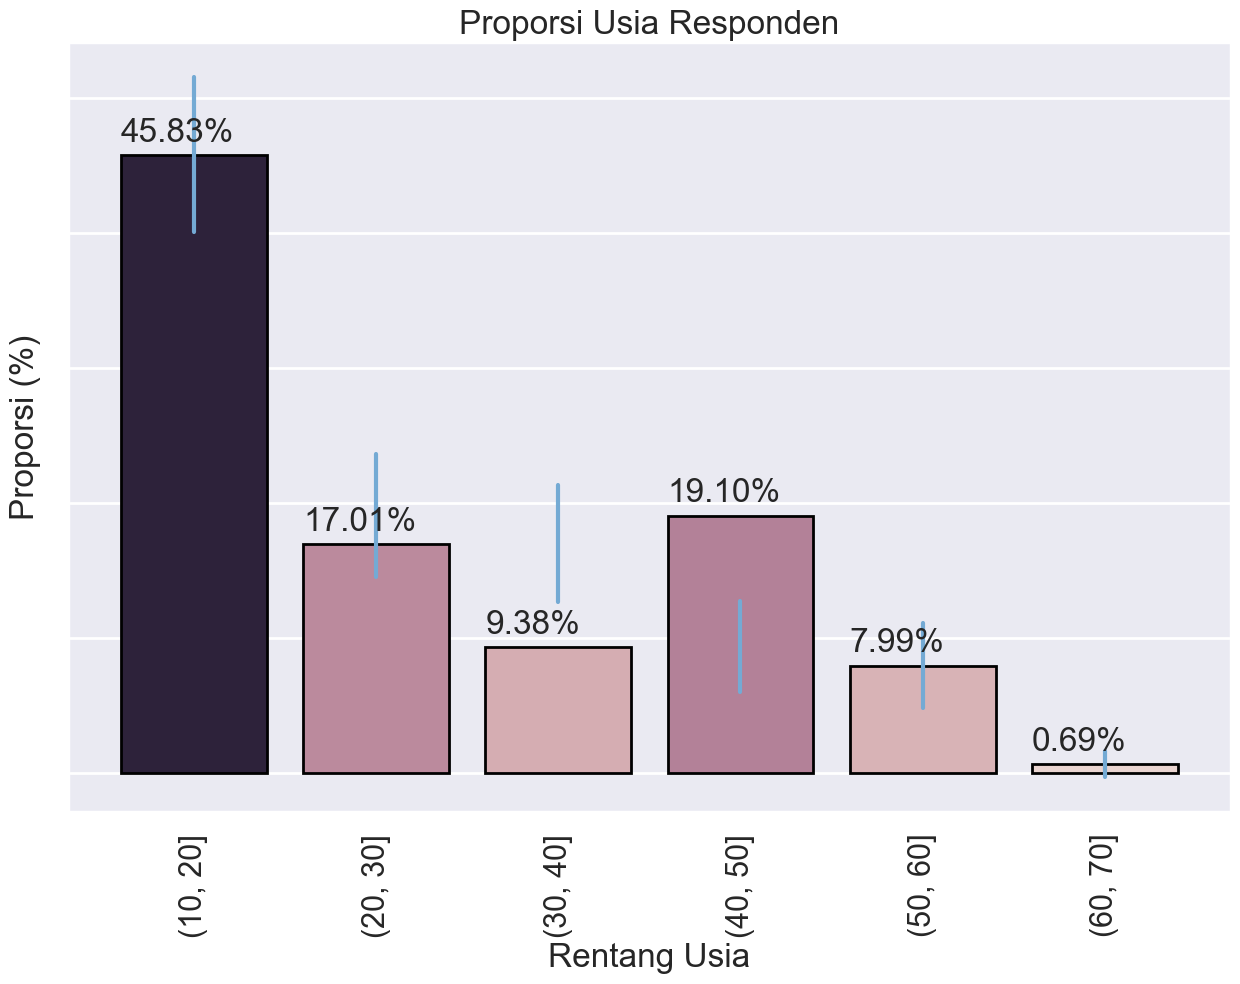

In [273]:

#usia
df_usia = pd.cut(df["usia"], bins=[10,20,30,40,50,60,70]).value_counts(normalize=True)
sns.set(style="whitegrid")
sns.set(rc={'figure.figsize':(15,10)})
sns.set(context="poster")
ax = sns.barplot(y=df_usia.values, x=df_usia.index, hue=df_usia.values, edgecolor="black",legend=None)
ax.set(title="Proporsi Usia Responden", xlabel="Rentang Usia", ylabel="Proporsi (%)")
ax.tick_params(rotation=90)
ax.set(yticklabels=[])

z, df_ci = ci_p_series(df_usia, df.shape[0])
print("z = ", z)
print(df_ci)
for i in range(len(df_ci)):
    ax.plot([i,i], [df_ci["Lower"][i], df_ci["Upper"][i]], color="#74aad4")

for p in ax.patches:
    ax.annotate('{0:.2f}%'.format(p.get_height()*100), (p.get_x(), p.get_height()+0.01))

z =  1.959963984540054
    index  Proportion     Lower     Upper
0    Pria    0.510417  0.452683  0.568150
1  Wanita    0.489583  0.431850  0.547317


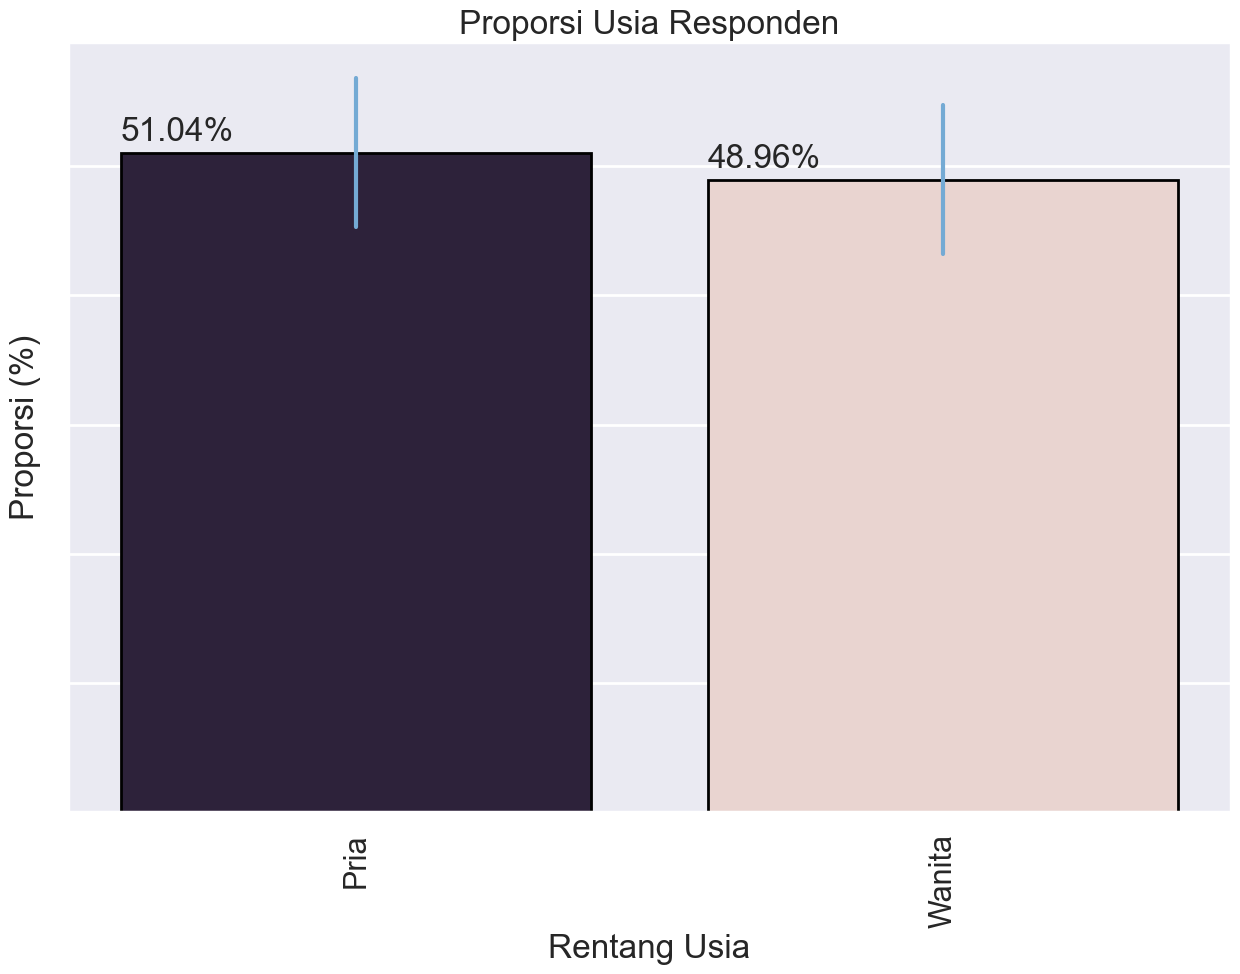

In [267]:

#usia
df_jenis_kelamin = countToSeries(df, "jenis_kelamin")
sns.set(style="whitegrid")
sns.set(rc={'figure.figsize':(15,10)})
sns.set(context="poster")
ax = sns.barplot(y=df_jenis_kelamin.values, x=df_jenis_kelamin.index, hue=df_jenis_kelamin.values, edgecolor="black",legend=None)
ax.set(title="Proporsi Usia Responden", xlabel="Rentang Usia", ylabel="Proporsi (%)")
ax.tick_params(rotation=90)
ax.set(yticklabels=[])

z, df_ci = ci_p_series(df_jenis_kelamin, df.shape[0])
print("z = ", z)
print(df_ci)
for i in range(len(df_ci)):
    ax.plot([i,i], [df_ci["Lower"][i], df_ci["Upper"][i]], color="#74aad4")

for p in ax.patches:
    ax.annotate('{0:.2f}%'.format(p.get_height()*100), (p.get_x(), p.get_height()+0.01))

z =  1.959963984540054
        index  Proportion     Lower     Upper
0     bandung    0.284722  0.232603  0.336842
1     jakarta    0.256944  0.206480  0.307408
2   tangerang    0.072917  0.042889  0.102945
3       medan    0.048611  0.023774  0.073448
4      bekasi    0.045139  0.021162  0.069116
5       bogor    0.038194  0.016059  0.060330
6  yogyakarta    0.038194  0.016059  0.060330
7        < 3%    0.190972  0.145576  0.236368


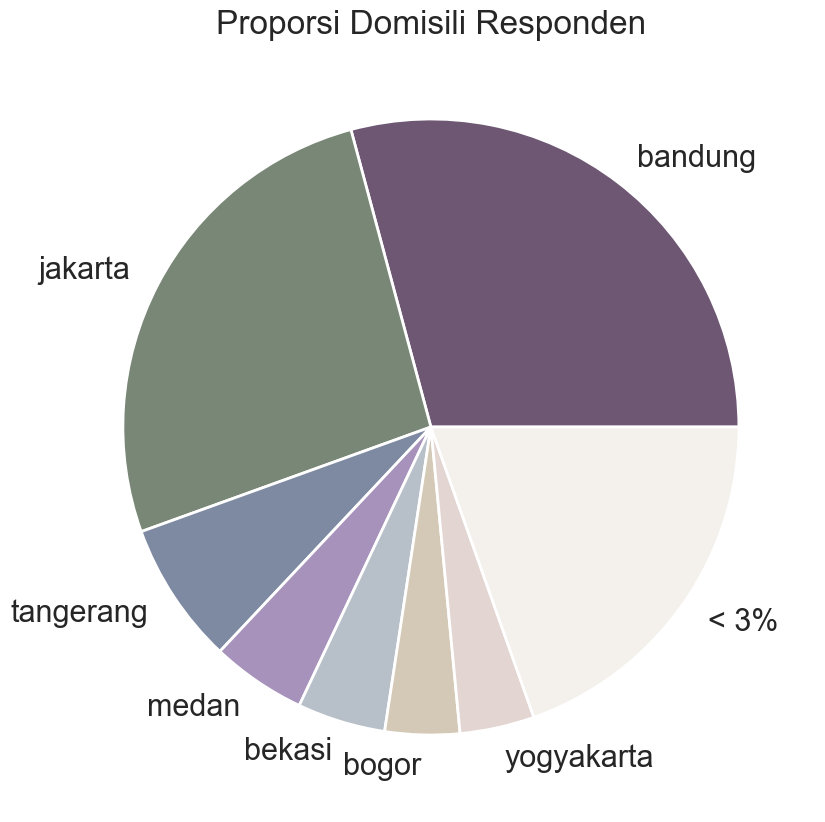

In [268]:

soft_dark_palette = ["#6E5773", "#798777", "#7E8AA2", "#A692BA", "#B7C0C8", "#D4C9B6", "#E3D6D2", "#F4F0EB"]
# def countToSeries(df, column, normalize=True, threshold=0, otherLabel="lain"):
domisili_series = countToSeries(df, "domisili", threshold=3, otherLabel="< 3%")
plt.pie(domisili_series.values, labels=domisili_series.index, colors=soft_dark_palette)
plt.title("Proporsi Domisili Responden")

plt.tick_params(rotation=90)

z, df_ci = ci_p_series(domisili_series, df.shape[0])
print("z = ", z)
print(df_ci)

z =  1.959963984540054
                       index  Proportion     Lower     Upper
0                      GoPay    0.750000  0.699991  0.800009
1                  ShopeePay    0.597222  0.540578  0.653866
2                        OVO    0.614583  0.558374  0.670793
3                       Dana    0.402778  0.346134  0.459422
4             eMoney Mandiri    0.298611  0.245756  0.351466
5                  Flazz BCA    0.222222  0.174208  0.270237
6                    LinkAja    0.135417  0.095899  0.174934
7   Tidak Menggunakan eMoney    0.059028  0.031809  0.086247
8                     Brizzi    0.069444  0.040085  0.098803
9                    JakCard    0.010417 -0.001309  0.022142
10                     iSaku    0.003472 -0.003321  0.010266


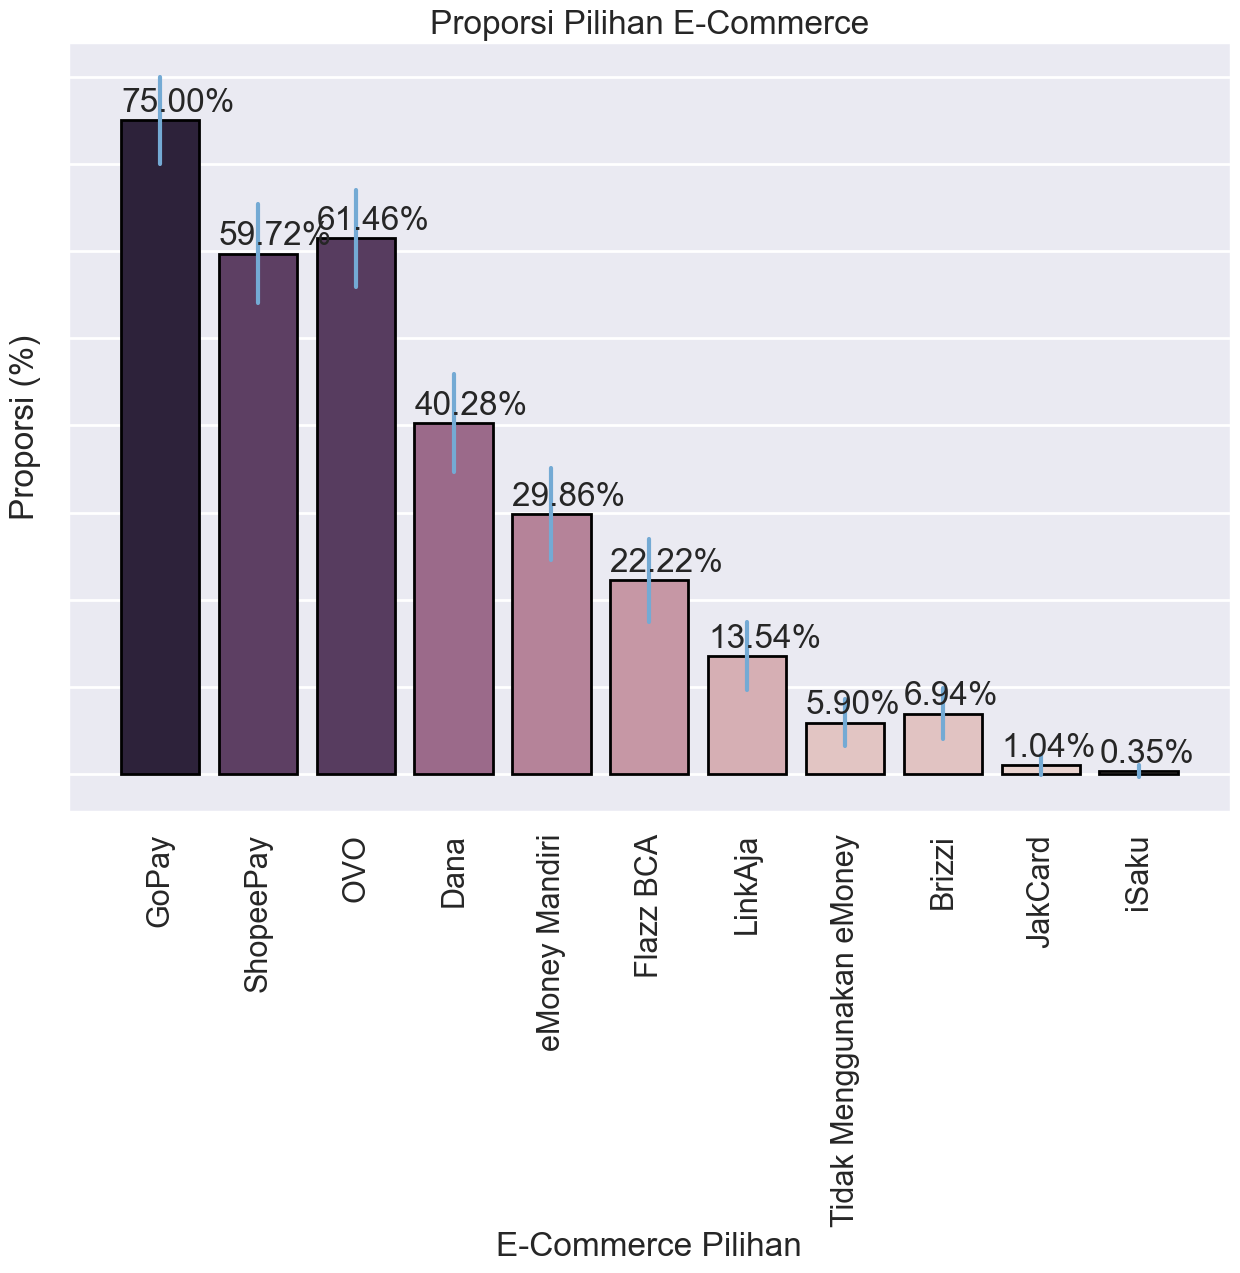

In [193]:
# Mari kita lihat emoney paling Populer
emoney_pilihan_cols = ["emoney_pilihan1", "emoney_pilihan2", "emoney_pilihan3", "emoney_pilihan4", "emoney_pilihan5", "emoney_pilihan6"
        , "emoney_pilihan7", "emoney_pilihan8", "emoney_pilihan9", "emoney_pilihan10", "emoney_pilihan11"]
emoney_series = multipleChoiceToSeries(df, emoney_pilihan_cols, normalize=True)
sns.set(style="whitegrid")
sns.set(rc={'figure.figsize':(15,10)})
sns.set(context="poster")
ax = sns.barplot(y=emoney_series.values, x=emoney_series.index, hue=emoney_series.values, edgecolor="black",legend=None)
ax.set(title="Proporsi Pilihan E-Commerce", xlabel="E-Commerce Pilihan", ylabel="Proporsi (%)")
ax.tick_params(rotation=90)
ax.set(yticklabels=[])

z, emoney_df = ci_p_series(emoney_series, df.shape[0])
print("z = ", z)
print(emoney_df)
for i in range(len(emoney_df)):
        ax.plot([i,i], [emoney_df["Lower"][i], emoney_df["Upper"][i]], color="#74aad4")

for p in ax.patches:
    plt.annotate('{0:.2f}%'.format(p.get_height()*100), (p.get_x(), p.get_height()+0.01))

10.242183803365783 12.591587243743977 0.11481668836835457
None


C:\Users\goldw\AppData\Local\Temp\ipykernel_42016\1125486441.py:93: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '19.995073891625616' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  Ei.loc[s,o] = df_cont.loc[s].sum() * df_cont.loc[:,o].sum() / df_cont.values.sum()
C:\Users\goldw\AppData\Local\Temp\ipykernel_42016\1125486441.py:93: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '43.891625615763544' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  Ei.loc[s,o] = df_cont.loc[s].sum() * df_cont.loc[:,o].sum() / df_cont.values.sum()
C:\Users\goldw\AppData\Local\Temp\ipykernel_42016\1125486441.py:93: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '12.679802955665025' has dtype incompatible with int64, ple

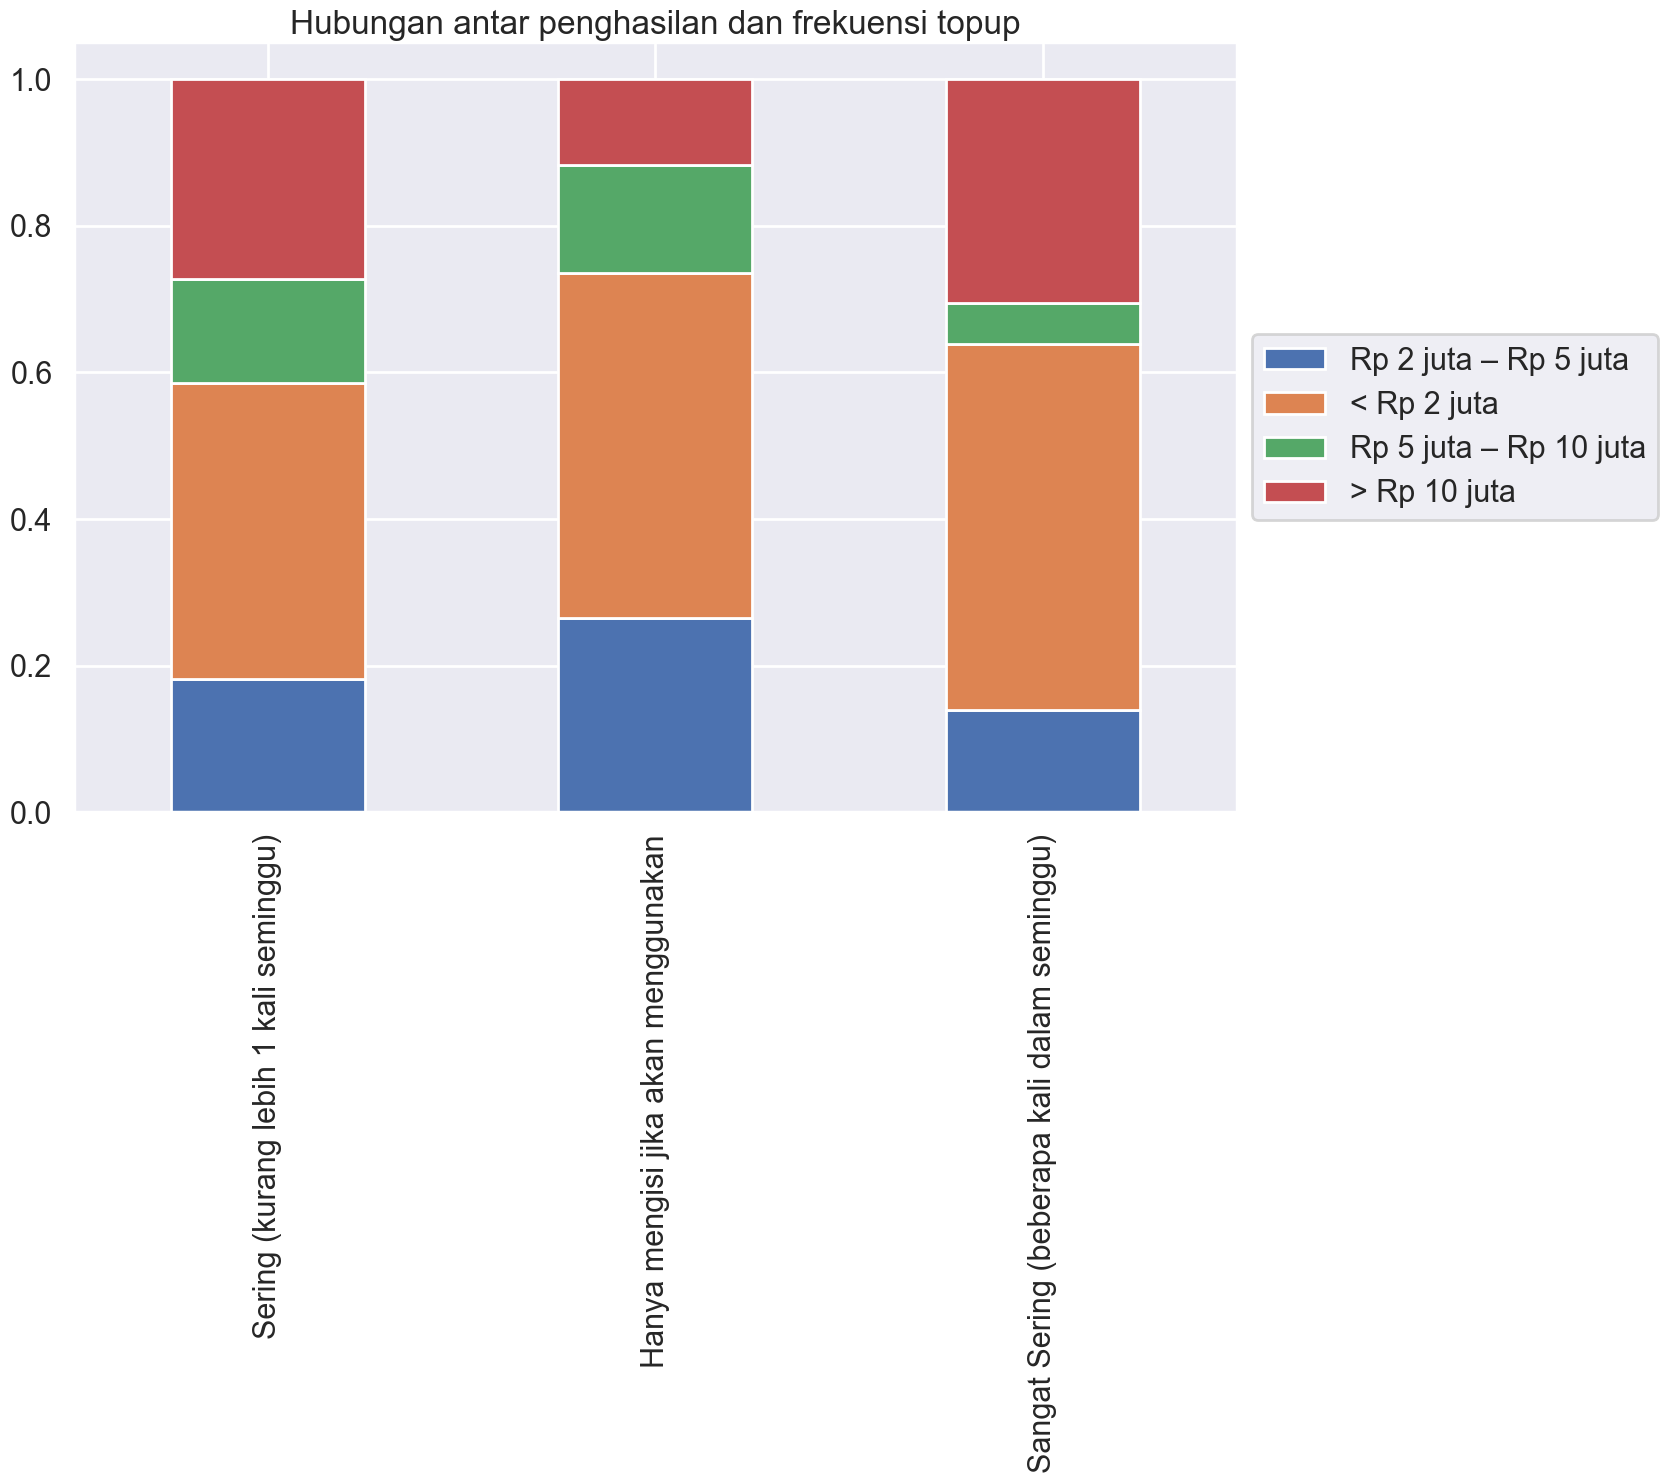

In [272]:
# Apakah ada pengaruh penghasilan dengan frekuensi top up?
newDict  = {}
for penghasilan in df["penghasilan"].unique():
    for freq in df["freq_topup"].dropna().unique():
        df_filtered = df.loc[(df["penghasilan"] == penghasilan) & (df["freq_topup"] == freq)]
        val = df_filtered.shape[0]
        if(penghasilan in newDict):
            newDict[penghasilan][freq] = val
        else:
            newDict[penghasilan] = {}
newDF = pd.DataFrame(newDict)

# CHI SQUARE
newDF
# def chiSqTest(df_cont, alpha=0.05): # Basically, Is the value of A affects B?
print(chiSqTest(newDF))


normalized_df = newDF.div(newDF.sum(axis=1), axis=0)
normalized_df
normalized_df.plot(kind="bar", stacked=True, title="Hubungan antar penghasilan dan frekuensi topup")
        
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))


['GoPay', 'ShopeePay', 'OVO', 'Dana', 'eMoney Mandiri', 'Flazz BCA', 'LinkAja', 'Tidak Menggunakan eMoney', 'Brizzi', 'JakCard', 'iSaku'] ['Aplikasi tidak bisa digunakan/ diakses', 'Kartu eMoney tidak terdeteksi', 'Telah Top Up tapi saldo tidak bertambah', 'Nominal saldo berkurang tanpa digunakan untuk transaksi']


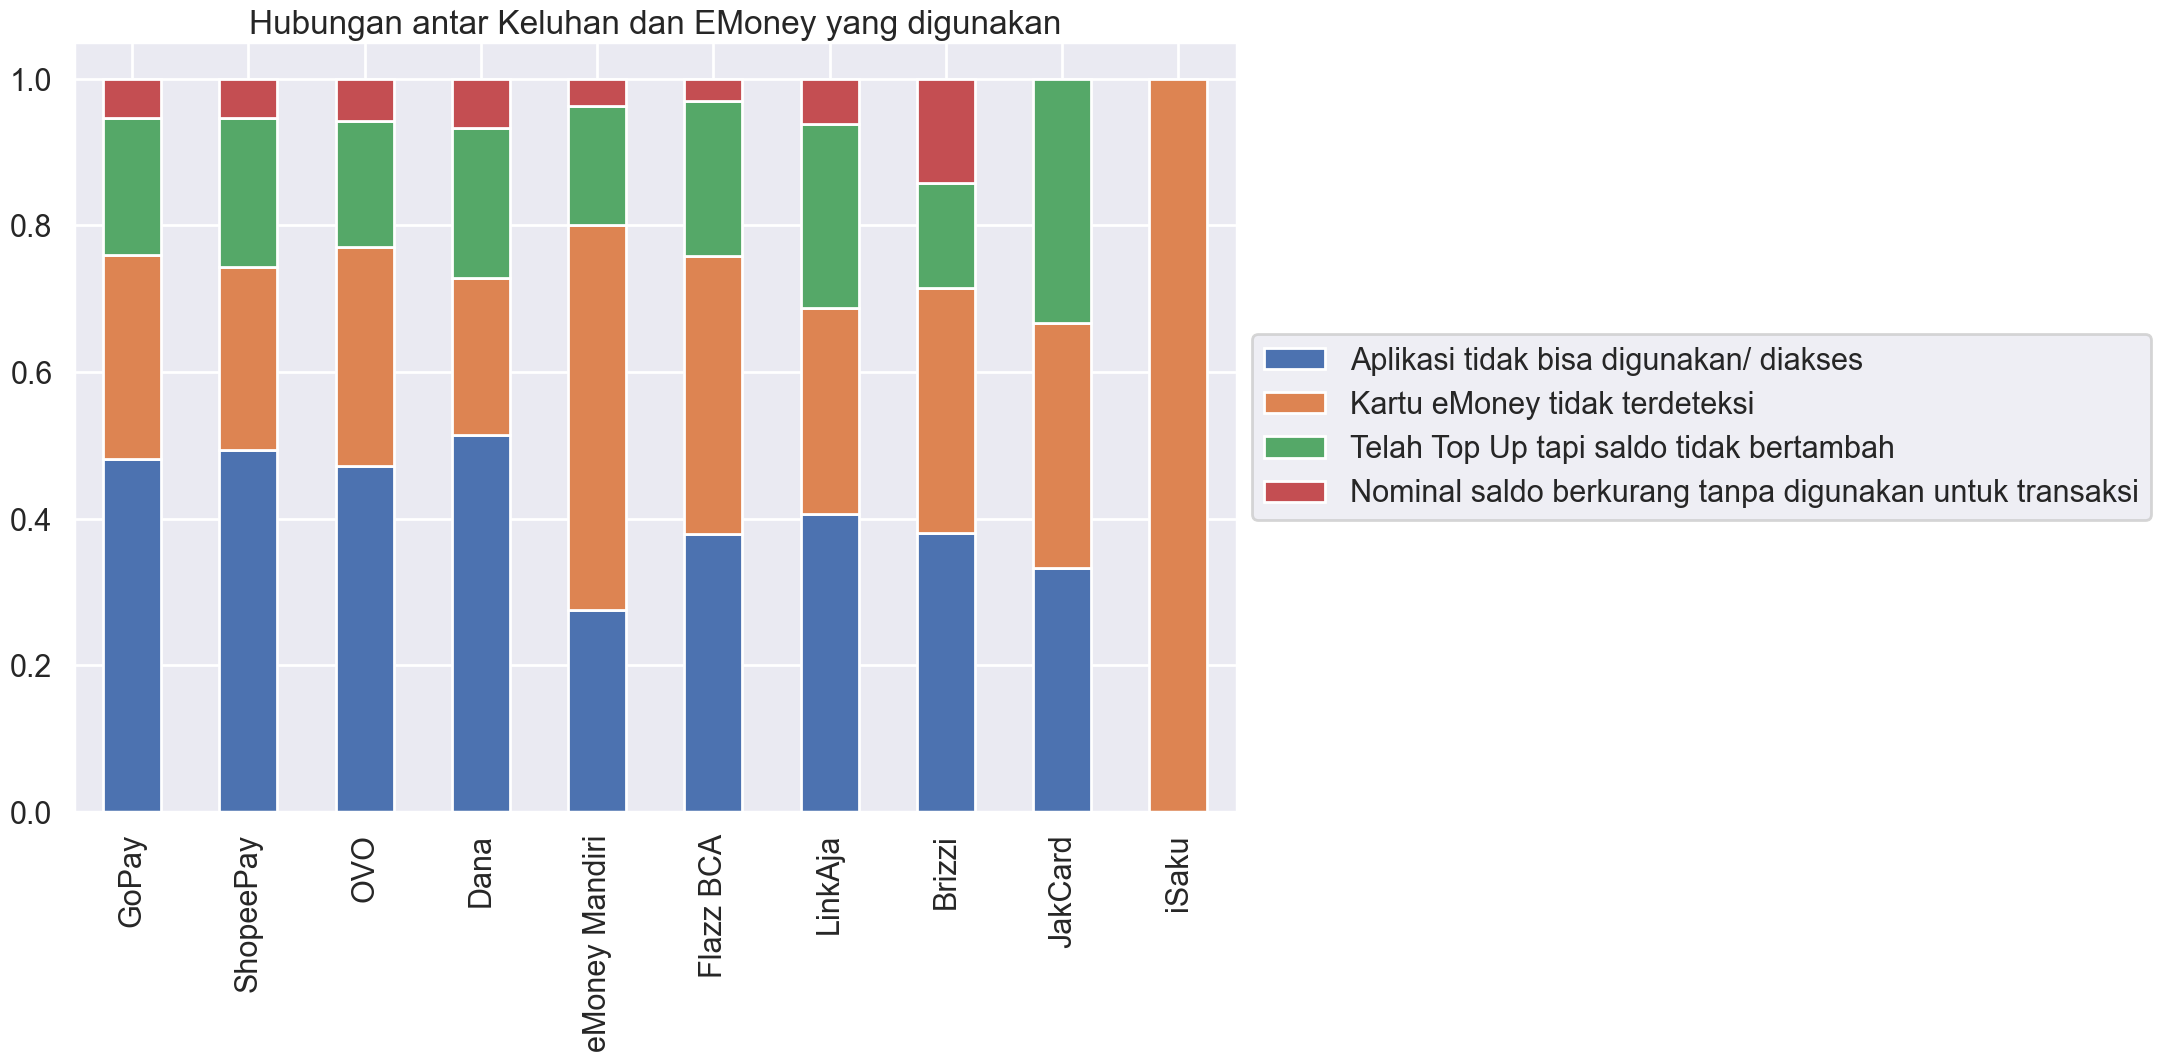

In [258]:
# Kok bisa???
emoney_pilihan_cols = ["emoney_pilihan1", "emoney_pilihan2", "emoney_pilihan3", "emoney_pilihan4", "emoney_pilihan5", "emoney_pilihan6"
        , "emoney_pilihan7", "emoney_pilihan8", "emoney_pilihan9", "emoney_pilihan10", "emoney_pilihan11"]
keluhan_emoney_cols = ["keluhan_emoney_1", "keluhan_emoney_2", "keluhan_emoney_3", "keluhan_emoney_4"]
emoney_vals = []
keluhan_vals = []
for col in emoney_pilihan_cols:
    emoney_vals.append(df[col].value_counts().index.tolist()[0])

for col in keluhan_emoney_cols:
    keluhan_vals.append(df[col].value_counts().index.tolist()[0])
print(emoney_vals, keluhan_vals)

newDict  = {}
for emoney in emoney_pilihan_cols:
    for keluhan in keluhan_emoney_cols:
        df_filtered = df.dropna(subset=[emoney, keluhan])
        val = df_filtered.shape[0]
        if(keluhan in newDict):
            newDict[keluhan][emoney] = val
        else:
            newDict[keluhan] = {}
            newDict[keluhan][emoney] = val
newDF = pd.DataFrame(newDict)
newDF = newDF.set_axis(emoney_vals, axis="index")
newDF = newDF.set_axis(keluhan_vals, axis="columns")
newDF = newDF.drop(['Tidak Menggunakan eMoney'], axis=0)
# newDF = pd.DataFrame(newDict)
# newDF
normalized_df = newDF.div(newDF.sum(axis=1), axis=0)
normalized_df
normalized_df.plot(kind="bar", stacked=True, title="Hubungan antar Keluhan dan EMoney yang digunakan")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
        


### Testing

In [68]:
        
# ecommerce_cols = ["ecommerce_1", "ecommerce_2", "ecommerce_3", "ecommerce_4", "ecommerce_5", "ecommerce_6"
#         , "ecommerce_7", "ecommerce_8", "ecommerce_9", "ecommerce_10", "ecommerce_11", "ecommerce_12"]
# seriesx = multipleChoiceToSeries(df, ecommerce_cols, normalize=True)
# print(seriesx)
# test = {
#     "Gopay":0.85,
#     "OVO":0.768,
#     "DANA":0.47,
#     "e-money":0.245,
#     "flazz":0.21
# }
# test = {"test": 0.4026}
# seriesx = pd.Series(test)
# print(ci_proportion(seriesx, 891, 0.05))
# ci_low, ci_upp = proportion_confint(value_counts_series, value_counts_series.sum(), alpha=0.05)
# print(ci_low)
# print(ci_upp)
# print("---")


# seriesTest = df_test["operator_pilihan"].value_counts()
# print(df_test)

# print(seriesTest)
# chiSqGoF(seriesTest, 0.05)

# df_test = pd.read_csv("../data/data_test_chisq.csv")
# df_contigency_test = pd.crosstab(df_test["kecepatan_download(mbps)"], df_test["operator_pilihan"])
# chiSqTest(df_contigency_test)